# DSLabs functions

In [35]:
%run "scripts/dslabs_functions.py"


# Data functions

In [36]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [37]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_0_2024_agg_time_mv_input.csv'

file_tag = "Google Merch Store 2024-2025"

# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
# target='E-commerce purchases Mobile' # using for testing null values on supporting variables

target='Sessions' # the target class for project which does not contain nulls


series: Series = data[target]


test_split_threshold = 0.7

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    int64  
 5   Checkouts                        427 non-null    int64  
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# Outlier Values Analysis

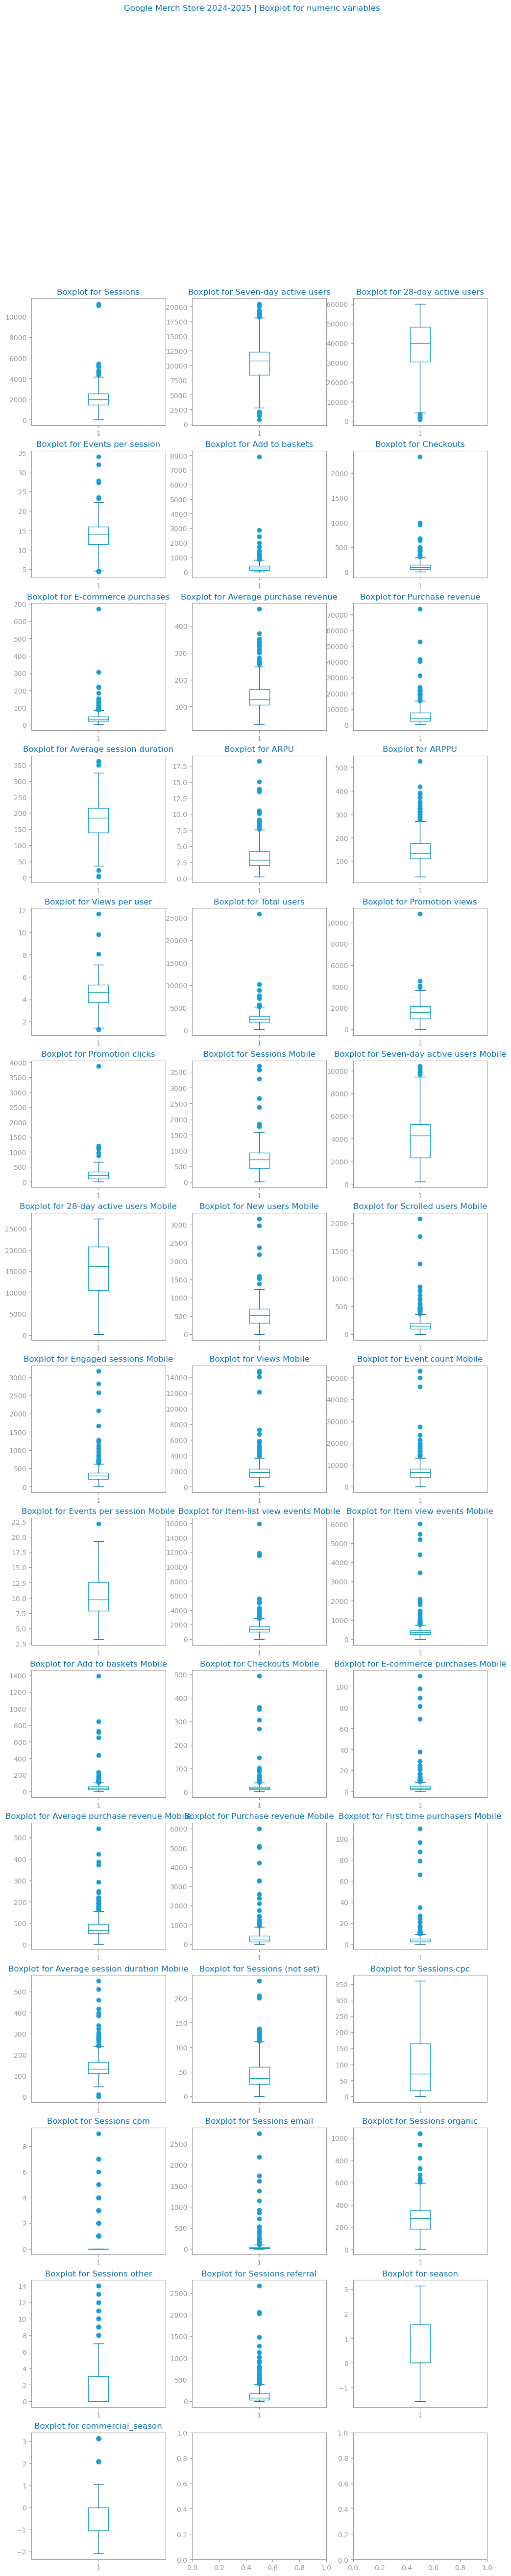

In [38]:

from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

# Outlier Truncation function

In [39]:
def determine_outlier_thresholds_for_var(summary5, std_based=True, threshold=1.5):
    top: float = 0
    bottom: float = 0
    if std_based:
        if 'std' in summary5 and 'mean' in summary5:
            std: float = threshold * summary5["std"]
            top = summary5["mean"] + std
            bottom = summary5["mean"] - std
        else:
            raise KeyError("The summary5 DataFrame must contain 'std' and 'mean' columns.")
    else:
        if 'q75' in summary5 and 'q25' in summary5:
            iqr: float = threshold * (summary5["q75"] - summary5["q25"])
            top = summary5["q75"] + iqr
            bottom = summary5["q25"] - iqr
        else:
            raise KeyError("The summary5 DataFrame must contain 'q75' and 'q25' columns.")
    return top, bottom

def truncate_outliers(df, summary5_df, outlier_vars,threshold=1.5):
    df_copy = df.copy()
    
    for outlier_var in outlier_vars:
        # Determine the outlier thresholds for the current variable
        top, bottom = determine_outlier_thresholds_for_var(summary5_df.loc[outlier_var], threshold=threshold)
        
        # Apply truncation to the current variable
        df_copy[outlier_var] = df_copy[outlier_var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    
    print("Data after truncating outliers:", df_copy.shape)
    return df_copy

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

# Outlier 1 - Truncation

In [40]:

# Compute summary statistics
summary5 = data.describe().transpose()
summary5['std'] = data.std()
summary5['mean'] = data.mean()

# vars=['Sessions','E-commerce purchases']

# select data columns into a list of values
vars = data.columns.tolist()
vars = [var for var in vars if var not in ['season', 'commercial_season', 'is_weekend', 'is_holiday']]

## Outlier 1 strategy apply

In [41]:



def apply_strategy_1(df):
    df_copy = df.copy()

    # this script is available in data_functions originally from DSLabs site in Outlier chapter   
    df_copy=truncate_outliers(df_copy, summary5, vars, threshold=2)
 
    return df_copy

data_1=apply_strategy_1(data)

series_1: Series = data_1[target]


data_1



Data after truncating outliers: (427, 46)


,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,982.0,3301.909259,13817.541765,19.948065,323.0,99.0,35.0,122.641143,4292.44,264.525093,...,34.0,0.0,45.0,263.0,0.0,50.0,0.000000,0.000000,0,0
2024-01-05,887.0,3301.909259,13817.541765,20.100338,374.0,97.0,40.0,189.072632,7184.76,290.474738,...,17.0,0.0,32.0,234.0,0.0,45.0,0.000000,0.000000,0,0
2024-01-06,426.0,3301.909259,13817.541765,16.227700,81.0,42.0,8.0,90.450000,723.60,219.513629,...,23.0,0.0,6.0,131.0,0.0,6.0,0.000000,-1.047198,1,0
2024-01-07,446.0,3301.909259,13817.541765,19.838565,126.0,49.0,16.0,75.339167,904.07,198.940130,...,23.0,0.0,7.0,135.0,0.0,11.0,0.000000,-1.047198,1,0
2024-01-08,981.0,3301.909259,13817.541765,17.174312,235.0,66.0,22.0,90.095238,1892.00,259.236133,...,22.0,0.0,43.0,269.0,0.0,56.0,0.000000,-1.047198,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,1298.0,7458.000000,29843.000000,11.164099,100.0,24.0,12.0,98.725000,1184.70,76.311350,...,76.0,0.0,2.0,118.0,0.0,39.0,1.570796,-1.047198,1,0
2025-03-02,1002.0,7404.000000,29753.000000,14.398204,118.0,44.0,22.0,83.159091,1829.50,176.766729,...,104.0,0.0,8.0,160.0,0.0,32.0,1.570796,-1.047198,1,0
2025-03-03,1451.0,7158.000000,29497.000000,18.512750,305.0,132.0,33.0,138.397879,4567.13,239.782187,...,150.0,0.0,39.0,315.0,0.0,181.0,1.570796,-1.047198,0,0


## Outlier 1 evaluate

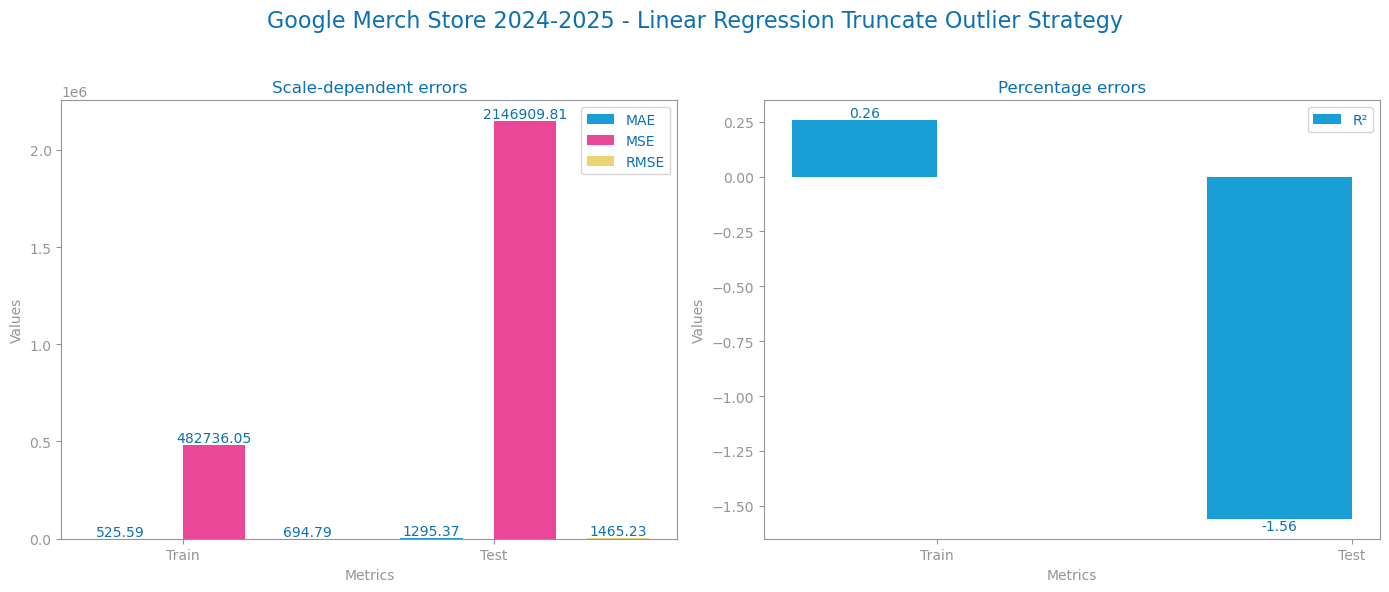

In [42]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()

# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)


plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Truncate Outlier Strategy")
# savefig(f"images/{file_tag}_linear_regression_eval.png")

## Out 1 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

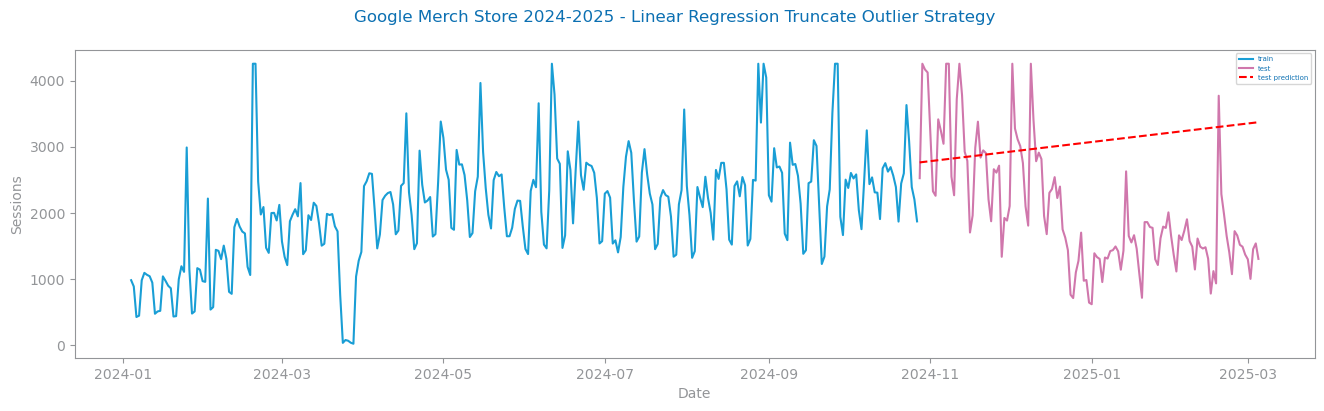

In [43]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Linear Regression Truncate Outlier Strategy",
    xlabel='Date',
    ylabel=target,
)

In [44]:
# Cross-validation

from sklearn.model_selection import cross_val_score


cv_scores_1 = cross_val_score(model_1, trnX_1, trnY_1, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_1}")
print(f"Mean Cross-Validation R² Score: {cv_scores_1.mean()}")


Cross-Validation R² Scores: [-0.24503747  0.03449441 -0.32172579 -0.04945714 -0.21228181]
Mean Cross-Validation R² Score: -0.15880155949265862


# Outliers 2 - Truncation 

## out 2 apply

## Out 2 eval

## Out 2 forecast

# Keep Outliers

## Keep Outliers strategy apply

In [45]:
def apply_strategy_2(df):


    df_copy=df.copy()

    return df_copy

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Keep Outliers evaluate

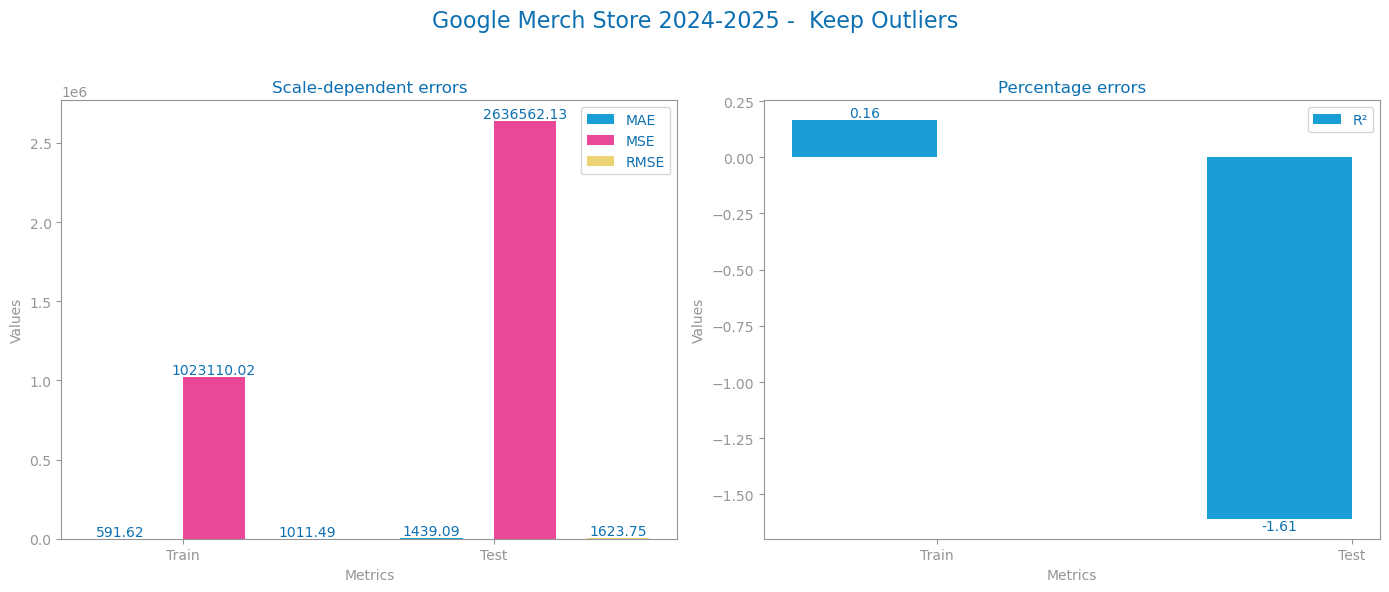

<Figure size 640x480 with 0 Axes>

In [46]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Prepare the training and testing data from dataframes with features and target
# trnX_2 = train_2.drop(columns=[target])
# trnY_2 = train_2[target]
# tstX_2 = test_2.drop(columns=[target])
# tstY_2 = test_2[target]


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} -  Keep Outliers")
savefig(f"images/{file_tag}_linear_regression_eval.png")

In [47]:
# Cross-validation

from sklearn.model_selection import cross_val_score


cv_scores_2 = cross_val_score(model_2, trnX_2, trnY_2, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_2}")
print(f"Mean Cross-Validation R² Score: {cv_scores_2.mean()}")

Cross-Validation R² Scores: [-0.17643846  0.0566884  -0.10706325 -0.11976073 -0.04560308]
Mean Cross-Validation R² Score: -0.07843542526521426


## Keep Outliers Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

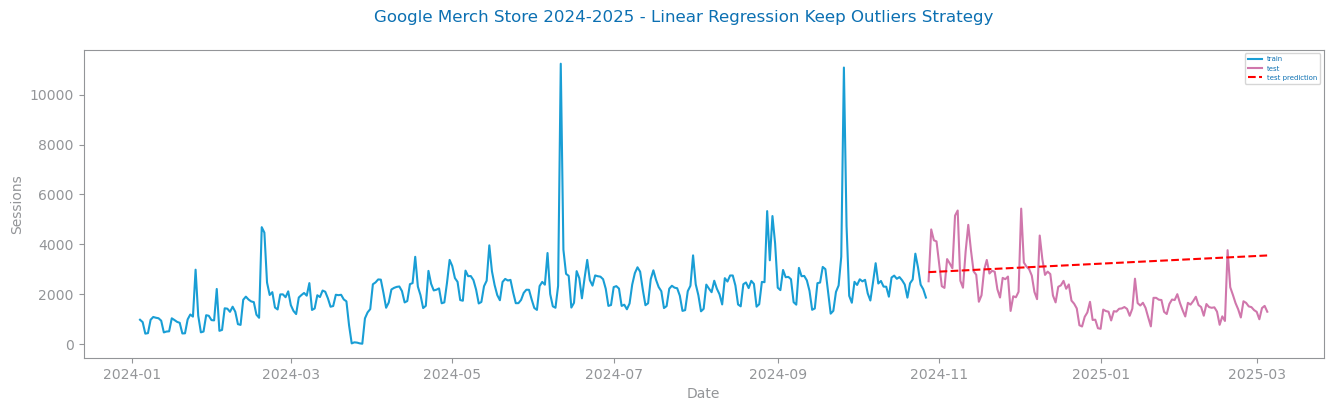

In [48]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Linear Regression Keep Outliers Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# Calculate performance metrics for each model
metrics = {
    "Model": ["Outlier Truncate", "Keep Outliers"],
    "MAE": [
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

              Model          MAE           MSE         RMSE        R²  \
0  Outlier Truncate  1295.372369  2.146910e+06  1465.233706 -1.559477   
1     Keep Outliers  1439.091566  2.636562e+06  1623.749405 -1.608578   

         MAPE  
0   92.425146  
1  101.243601  


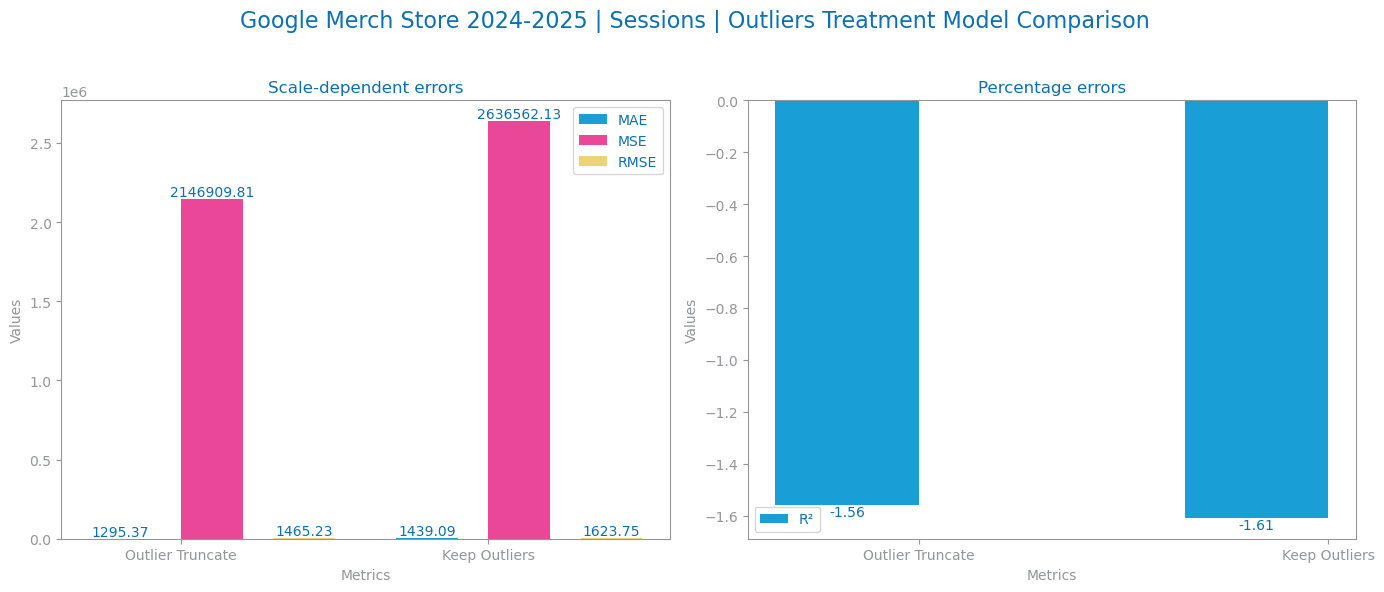

In [50]:
plot_performance_metrics(metrics, title=f"{file_tag} | {target} | Outliers Treatment Model Comparison")

# save to csv

In [51]:

if test_data==False:
    
    data_copy=data.copy()
    
    
    data_copy=apply_strategy_1(data_copy)
    
    data_copy.reset_index(inplace=True)
    
    
    data_copy.to_csv(f"data/df_merch_0_2024_agg_time_outlier_input.csv", index=False)
    

Data after truncating outliers: (427, 46)
